In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data
df = pd.read_csv('price_Optimization.csv')
print(df)

    Competitors_Price      Demand
0            5.939322  993.716473
1            7.436704  993.329599
2            6.424870  993.499055
3            5.903949  993.758589
4            4.812893  993.679768
..                ...         ...
95           2.648722  994.299717
96           6.278616  993.623798
97           1.180968  995.573726
98           8.460460  993.286717
99           1.042259  995.345089

[100 rows x 2 columns]


<Axes: xlabel='Competitors_Price', ylabel='Demand'>

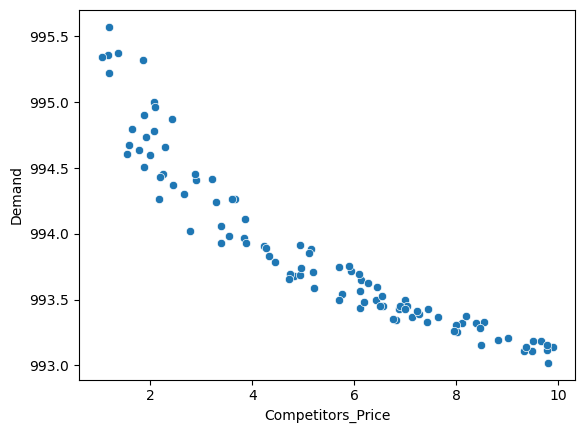

In [3]:
# Scatter plot

sns.scatterplot(df,x='Competitors_Price',y='Demand')

In [4]:
# Split data into features and label (X,y)

X = df.drop('Demand',axis=1)
y = df['Demand']

# Let us reshape y to get both dimensions
y = y.values.reshape(-1,1)

print(X.shape,y.shape)

(100, 1) (100, 1)


In [5]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [6]:
# Fit a Decision Tree Regression model

clf = tree.DecisionTreeRegressor(random_state=0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print(f"RMSE on training data: {np.sqrt(mean_squared_error(y_pred,y_train))}")

RMSE on training data: 0.0


In [7]:
# Error on test data

y_test_pred = clf.predict(X_test)

print(f"RMSE on test data: {np.sqrt(mean_squared_error(y_test_pred,y_test))}")

RMSE on test data: 0.11510319055316616


In [8]:
# Generate price points for prediction
prices = np.linspace(1, 10, 100).reshape(-1, 1)

# Predict demand for the price points
predicted_demand = clf.predict(prices)

/opt/anaconda3/envs/esomar/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


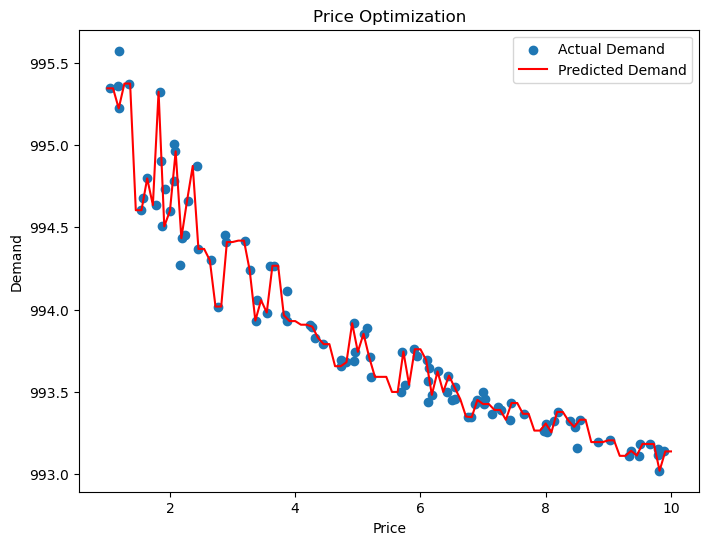

In [9]:
# Plot Visualize the price-demand relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Competitors_Price'], df['Demand'], label='Actual Demand')
plt.plot(prices, predicted_demand, color='red', label='Predicted Demand')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Price Optimization')
plt.legend()
plt.show()


[Text(0.4216123949579832, 0.9545454545454546, 'x[0] <= 3.752\nsquared_error = 0.418\nsamples = 90\nvalue = 993.908'),
 Text(0.1796218487394958, 0.8636363636363636, 'x[0] <= 2.121\nsquared_error = 0.191\nsamples = 33\nvalue = 994.639'),
 Text(0.07773109243697479, 0.7727272727272727, 'x[0] <= 1.447\nsquared_error = 0.11\nsamples = 16\nvalue = 994.979'),
 Text(0.04201680672268908, 0.6818181818181818, 'x[0] <= 1.181\nsquared_error = 0.013\nsamples = 5\nvalue = 995.375'),
 Text(0.025210084033613446, 0.5909090909090909, 'x[0] <= 1.175\nsquared_error = 0.011\nsamples = 3\nvalue = 995.426'),
 Text(0.01680672268907563, 0.5, 'x[0] <= 1.106\nsquared_error = 0.0\nsamples = 2\nvalue = 995.353'),
 Text(0.008403361344537815, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 995.345'),
 Text(0.025210084033613446, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 995.36'),
 Text(0.03361344537815126, 0.5, 'squared_error = -0.0\nsamples = 1\nvalue = 995.574'),
 Text(0.0588235294

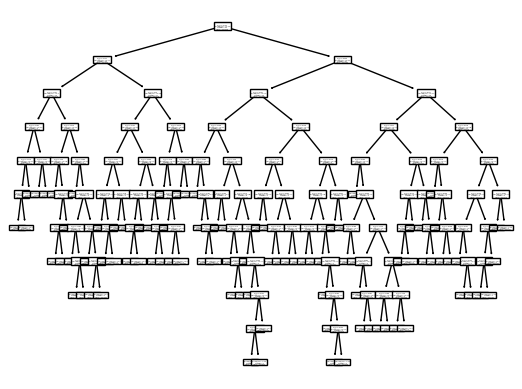

In [10]:
tree.plot_tree(clf)

After switching to a Decision Tree Regression, I saw the the accuracy was much better on the model, and it was much more fit. The predicited value curves goes through almost every single actual point on the graph. This shows that this model is highly accurate, and based off the tree shown above, we can see there are lots of leaves which allows many specific options. The tree decision is a great fit for this data set.